***
## Pandas (Data Maniplulation)
***

In [1]:
import pandas as pd
import numpy as np
print(f'version = {pd.__version__}')

version = 2.2.2


***
## How to read ?
***

In [2]:
import os
folder_path = r'C:\Users\User\Desktop\北大統計-授課資料\113-2 日間部-Python程式設計\ReadList'
# read from csv
df_csv = pd.read_csv(os.path.join(folder_path,'username.csv'))
# specified the delimeter, default value is ',' 
df_csv_sep = pd.read_csv(os.path.join(folder_path,'username.csv'),sep = ';')
display(df_csv,
        df_csv_sep)

,Username; Identifier;First name;Last name
0,booker12;9012;Rachel;Booker
1,grey07;2070;Laura;Grey
2,johnson81;4081;Craig;Johnson
3,jenkins46;9346;Mary;Jenkins
4,smith79;5079;Jamie;Smith


,Username,Identifier,First name,Last name
0,booker12,9012,Rachel,Booker
1,grey07,2070,Laura,Grey
2,johnson81,4081,Craig,Johnson
3,jenkins46,9346,Mary,Jenkins
4,smith79,5079,Jamie,Smith


In [3]:
# Read from excel
df_sht = pd.read_excel(os.path.join(folder_path,'Carbon emission data.xlsx'))
df_full = pd.read_excel(os.path.join(folder_path,'Carbon emission data.xlsx'),
                        sheet_name = None)
display(df_sht,
        df_full)

,mL CH4/h,SC,SF,SP,SFP,DC,DF,DP,DFP
0,7 d,4.67,4.81,3.79,2.92,5.10,4.96,3.65,3.06
1,14 d,4.52,4.81,3.50,2.33,4.96,4.38,2.77,2.19
2,21 d,2.33,2.04,1.60,0.73,3.21,2.77,2.19,1.75
3,28 d,1.75,1.90,1.17,0.88,2.77,3.06,1.75,0.88
4,35 d,0.88,0.88,1.02,0.88,2.63,2.33,2.33,0.44
5,42 d,0.73,0.88,0.88,0.58,0.44,0.73,0.88,0.73


{'Carbon emission':   mL CH4/h    SC    SF    SP   SFP    DC    DF    DP   DFP
 0      7 d  4.67  4.81  3.79  2.92  5.10  4.96  3.65  3.06
 1     14 d  4.52  4.81  3.50  2.33  4.96  4.38  2.77  2.19
 2     21 d  2.33  2.04  1.60  0.73  3.21  2.77  2.19  1.75
 3     28 d  1.75  1.90  1.17  0.88  2.77  3.06  1.75  0.88
 4     35 d  0.88  0.88  1.02  0.88  2.63  2.33  2.33  0.44
 5     42 d  0.73  0.88  0.88  0.58  0.44  0.73  0.88  0.73,
 'Carbon markets':     Month and Year  AAU    CER  ERU RMU       NZU     Total
 0       2008-01-01    0    0.0    0   0         0         0
 1       2008-02-01    0    0.0    0   0         0         0
 2       2008-03-01    0  108.0    0   0         0       108
 3       2008-04-01    0   20.0    0   0         0        20
 4       2008-05-01    0    0.0    0   0         0         0
 ..             ...  ...    ...  ...  ..       ...       ...
 201     2024-10-01    0    0.0    0   0  18312569  18312569
 202     2024-11-01    0    0.0    0   0  12314765  12

In [4]:
# Read from txt by directly pandas
df_txt = pd.read_csv(os.path.join(folder_path,'emails.txt'),header = None)
df_txt.head()

,0
0,asmith@gmail.com
1,ajohnson@gmail.com
2,awilliams@gmail.com
3,ajones@gmail.com
4,abrown@gmail.com


In [5]:
# read text with open
dL = []
with open(os.path.join(folder_path,'emails.txt')) as f:
    for row in f.readlines():
        dL.append(row.replace('\n',''))
dL[:5]

['asmith@gmail.com',
 'ajohnson@gmail.com',
 'awilliams@gmail.com',
 'ajones@gmail.com',
 'abrown@gmail.com']

In [6]:
import pyodbc
# Define the connection str
connstr = 'DRIVER=SQL Server;SERVER={};DATABASE={};Trusted_Connection=yes'
uid_login = [r'LAPTOP-K9RBHJ19\SQLEXPRESS','NTPUSTAT']
connstr = connstr.format(*uid_login)
# create connection
conn = pyodbc.connect(connstr)
# read with SQL
sqlstr = 'Select * from [NTPUSTAT].[dbo].[Member_Info]'
df_sql = pd.read_sql(sqlstr,conn)
display(df_sql.head())

C:\Users\User\AppData\Local\Temp\ipykernel_13056\8195345.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sql = pd.read_sql(sqlstr,conn)


,MemberId,RecordDate,GameMode,GameSession,Buy-in,OriginScore,Discount,FinalScore,Mdate
0,112434,2025-03-07,3400,2,1,4,0,4,2025-03-07 23:58:23
1,133992,2025-03-07,1200,1,2,4,0,4,2025-03-07 23:54:44
2,133992,2025-03-07,3400,2,1,4,-1,3,2025-03-07 23:58:23
3,331834,2025-03-07,1200,1,2,4,0,4,2025-03-07 23:54:44
4,331837,2025-03-07,3400,2,1,4,0,4,2025-03-07 23:58:23


***
## Pandas Series as 1-dim Array
***

In [7]:
# Create by list
data = pd.Series([np.exp(k) for k in range(4)],
                 index = [f'exp({k})' for k in range(4)])
display(data,
        data.values, # similar to NumPy array
        data.index,
        data[1:3], # implicit index
        data['exp(2)'])

exp(0)     1.000000
exp(1)     2.718282
exp(2)     7.389056
exp(3)    20.085537
dtype: float64

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692])

Index(['exp(0)', 'exp(1)', 'exp(2)', 'exp(3)'], dtype='object')

exp(1)    2.718282
exp(2)    7.389056
dtype: float64

np.float64(7.38905609893065)

In [8]:
# Construct Series from Dictionary
score_sheet = {'Leborn James':41131,
               'Kobe Bryant':33643,
               'Michael Jordan':32292,
               'Dirk Nowitzki':31560,
               'Kevin Durant':29505,
               'Tim Duncan':26496}
data = pd.Series(score_sheet)
display(data,
        data['Kobe Bryant'],
        data['Kobe Bryant':'Kevin Durant']) # array-style

Leborn James      41131
Kobe Bryant       33643
Michael Jordan    32292
Dirk Nowitzki     31560
Kevin Durant      29505
Tim Duncan        26496
dtype: int64

np.int64(33643)

Kobe Bryant       33643
Michael Jordan    32292
Dirk Nowitzki     31560
Kevin Durant      29505
dtype: int64

***
## Pandas DataFrame as Generalized 2-dim NumPy Array
***

In [9]:
game_sheet = {'Leborn James':1520,
              'Kobe Bryant':1346,
              'Michael Jordan':1072,
              'Dirk Nowitzki':1522,
              'Kevin Durant':1082,
              'Tim Duncan':1392}
mdf = pd.DataFrame({'Score':score_sheet,
                    'Game':game_sheet})
display(mdf,
        mdf.index,
        mdf.columns,
        mdf['Game'], # ditionary-style access
        mdf.Game) # attribute-style access

,Score,Game
Leborn James,41131,1520
Kobe Bryant,33643,1346
Michael Jordan,32292,1072
Dirk Nowitzki,31560,1522
Kevin Durant,29505,1082
Tim Duncan,26496,1392


Index(['Leborn James', 'Kobe Bryant', 'Michael Jordan', 'Dirk Nowitzki',
       'Kevin Durant', 'Tim Duncan'],
      dtype='object')

Index(['Score', 'Game'], dtype='object')

Leborn James      1520
Kobe Bryant       1346
Michael Jordan    1072
Dirk Nowitzki     1522
Kevin Durant      1082
Tim Duncan        1392
Name: Game, dtype: int64

Leborn James      1520
Kobe Bryant       1346
Michael Jordan    1072
Dirk Nowitzki     1522
Kevin Durant      1082
Tim Duncan        1392
Name: Game, dtype: int64

***
## Pandas Index is immutable
***

In [10]:
data = pd.Series([np.exp(k) for k in range(4)])
try:
    data.index[1] = 2
except Exception as e:
    print(e)

Index does not support mutable operations


In [11]:
data = pd.Series([2**k for k in range(4)],
                 index = [f'a{k}' for k in range(4)])
display(data,
        'a0' in data, # examine the indice
        data.keys(),
        list(data.items()))

a0    1
a1    2
a2    4
a3    8
dtype: int64

True

Index(['a0', 'a1', 'a2', 'a3'], dtype='object')

[('a0', 1), ('a1', 2), ('a2', 4), ('a3', 8)]

In [12]:
# Extend a Series by assigning to a new index value
data['a4'] = 16
display(data,
        data[(data > 3) & (data < 10)], # masking
        data[['a1','a4']]) # fancy indexing

a0     1
a1     2
a2     4
a3     8
a4    16
dtype: int64

a2    4
a3    8
dtype: int64

a1     2
a4    16
dtype: int64

***
## Indexers : iloc and loc
***

In [13]:
data = pd.Series(list('abcde'),index = [1,2,3,5,9])
display(data,
        data.loc[3], # explicit index
        data.iloc[3], # implicit index
        data.loc[1:3],
        data.iloc[1:3])

1    a
2    b
3    c
5    d
9    e
dtype: object

'c'

'd'

1    a
2    b
3    c
dtype: object

2    b
3    c
dtype: object

***
## Adding a new columns
***

In [14]:
mdf['Ave pt.'] = mdf.Score / mdf.Game
display(mdf,
        mdf.values, # data array
        mdf.T, # swap rows and columns
        mdf.values[0], # access a row
        mdf['Game']) # access a column

,Score,Game,Ave pt.
Leborn James,41131,1520,27.059868
Kobe Bryant,33643,1346,24.994799
Michael Jordan,32292,1072,30.123134
Dirk Nowitzki,31560,1522,20.735874
Kevin Durant,29505,1082,27.268946
Tim Duncan,26496,1392,19.034483


array([[4.11310000e+04, 1.52000000e+03, 2.70598684e+01],
       [3.36430000e+04, 1.34600000e+03, 2.49947994e+01],
       [3.22920000e+04, 1.07200000e+03, 3.01231343e+01],
       [3.15600000e+04, 1.52200000e+03, 2.07358739e+01],
       [2.95050000e+04, 1.08200000e+03, 2.72689464e+01],
       [2.64960000e+04, 1.39200000e+03, 1.90344828e+01]])

,Leborn James,Kobe Bryant,Michael Jordan,Dirk Nowitzki,Kevin Durant,Tim Duncan
Score,41131.000000,33643.000000,32292.000000,31560.000000,29505.000000,26496.000000
Game,1520.000000,1346.000000,1072.000000,1522.000000,1082.000000,1392.000000
Ave pt.,27.059868,24.994799,30.123134,20.735874,27.268946,19.034483


array([4.11310000e+04, 1.52000000e+03, 2.70598684e+01])

Leborn James      1520
Kobe Bryant       1346
Michael Jordan    1072
Dirk Nowitzki     1522
Kevin Durant      1082
Tim Duncan        1392
Name: Game, dtype: int64

In [15]:
display(mdf.iloc[:3,:2],
        mdf.loc[:'Dirk Nowitzki',:'Game'],
        mdf.loc[mdf['Ave pt.'] < 25,:'Game'])

,Score,Game
Leborn James,41131,1520
Kobe Bryant,33643,1346
Michael Jordan,32292,1072


,Score,Game
Leborn James,41131,1520
Kobe Bryant,33643,1346
Michael Jordan,32292,1072
Dirk Nowitzki,31560,1522


,Score,Game
Kobe Bryant,33643,1346
Dirk Nowitzki,31560,1522
Tim Duncan,26496,1392


In [16]:
mdf.iloc[0,-1] = 40
display(mdf)

,Score,Game,Ave pt.
Leborn James,41131,1520,40.000000
Kobe Bryant,33643,1346,24.994799
Michael Jordan,32292,1072,30.123134
Dirk Nowitzki,31560,1522,20.735874
Kevin Durant,29505,1082,27.268946
Tim Duncan,26496,1392,19.034483


***
## Index Preservation
***

In [17]:
Xs = pd.Series([1,2,3,7,12],index = list('abcde'))
df = pd.DataFrame([[123,435],[44,69]],
                  columns = ['Placebo','Treatment'],
                  index = ['Alive','Die'])
display(Xs,
        np.log2(Xs),
        df,
        df / np.sum(df,axis = 0))

a     1
b     2
c     3
d     7
e    12
dtype: int64

a    0.000000
b    1.000000
c    1.584963
d    2.807355
e    3.584963
dtype: float64

,Placebo,Treatment
Alive,123,435
Die,44,69


,Placebo,Treatment
Alive,0.736527,0.863095
Die,0.263473,0.136905


***
## Index Alignment
***

In [18]:
area = pd.Series({'Alaska': 1723337,
                  'Texas': 695662,
                  'California': 423967},name='area')
population = pd.Series({'California':39538223,
                        'Texas':29145505,
                        'Florida':21538187}, name='population')
display(population / area,
        area.index.union(population.index))

Alaska              NaN
California    93.257784
Florida             NaN
Texas         41.896072
dtype: float64

Index(['Alaska', 'California', 'Florida', 'Texas'], dtype='object')

In [19]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
display(A + B,
        A.add(B,fill_value = 0))

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [20]:
rng = np.random.default_rng(42)
A = pd.DataFrame(rng.integers(0,20,(2,2)),columns = ['a','b'])
B = pd.DataFrame(rng.integers(0,10,(3,3)),columns = ['b','a','c'])
display(A,
        B,
        A+B,
        A.add(B,fill_value = A.values.mean()))

,a,b
0,1,15
1,13,8


,b,a,c
0,4,8,0
1,6,2,0
2,5,9,7


,a,b,c
0,9.0,19.0,NaN
1,15.0,14.0,NaN
2,NaN,NaN,NaN


,a,b,c
0,9.00,19.00,9.25
1,15.00,14.00,9.25
2,18.25,14.25,16.25


***
## Interpolation
***

,origin,linear,quad,nearest
0,30.0,30.00,30.000000,30.0
1,NaN,35.50,37.396635,30.0
2,41.0,41.00,41.000000,41.0
3,NaN,39.00,40.810096,41.0
4,NaN,37.00,37.487981,35.0
5,35.0,35.00,35.000000,35.0
6,NaN,36.25,34.007212,35.0
7,NaN,37.50,34.509615,35.0
8,NaN,38.75,36.507212,40.0
9,40.0,40.00,40.000000,40.0


<Axes: >

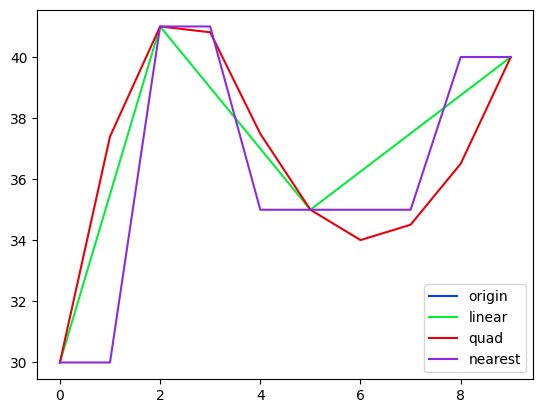

In [21]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-bright')
# Sample DataFrame with missing values
df = pd.Series([30,np.nan,41,np.nan,np.nan,35,np.nan,np.nan,np.nan,40],name = 'Temp')
odf = df.copy()
s1 = odf.interpolate(method = 'linear')
s2 = odf.interpolate(method = 'quadratic')
s3 = odf.interpolate(method = 'nearest')
mdf = pd.concat([df,s1,s2,s3],axis = 1)
mdf.columns = ['origin','linear','quad','nearest']
display(mdf)
mdf.plot()

## from other package

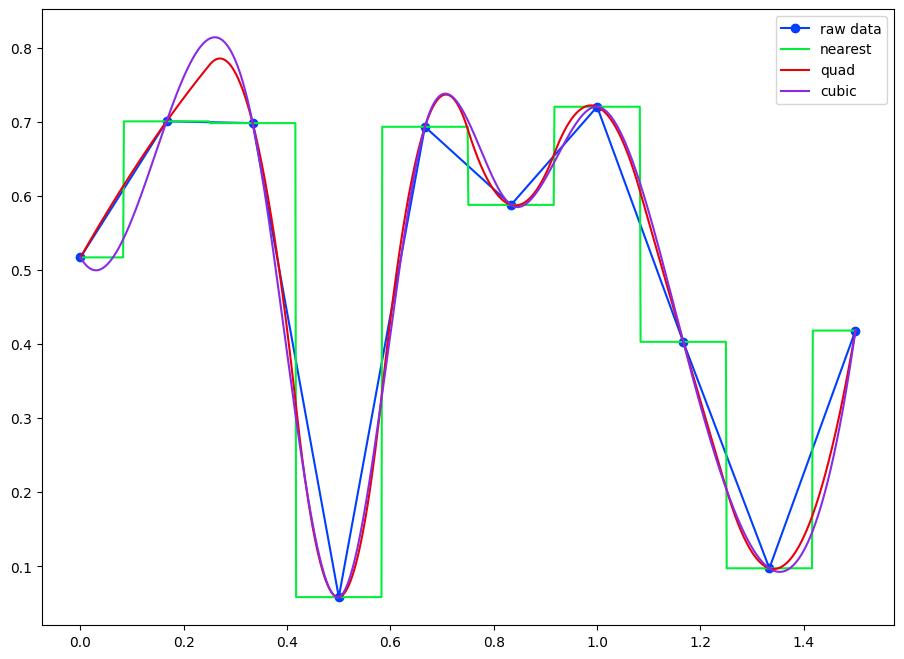

In [22]:
from scipy.interpolate import interp1d
xmin, xmax = 0,1.5
n1, n2 = 10, 1000
x = np.linspace(xmin,xmax,n1)
x1 = np.linspace(xmin,xmax,n2)
y = np.random.rand(n1)
map1 = interp1d(x,y,kind = 'nearest')
map2 = interp1d(x,y,kind = 'quadratic')
map3 = interp1d(x,y,kind = 'cubic')
y1 = map1(x1)
y2 = map2(x1)
y3 = map3(x1)
plt.figure(figsize = [11,8])
plt.plot(x,y,'-o',label = 'raw data')
plt.plot(x1,y1,label = 'nearest')
plt.plot(x1,y2,label = 'quad')
plt.plot(x1,y3,label = 'cubic')
plt.legend()

***
## Sentinel Value
***

In [23]:
# None as a Sentinel Value
v1 = np.array([1,None,2,3])
display(v1)
try:
	v1.sum()
except Exception as e:
	print(e)

array([1, None, 2, 3], dtype=object)

unsupported operand type(s) for +: 'int' and 'NoneType'


In [24]:
# NaN: Missing Numerical Data
v2 = np.array([1,np.nan,3,4])
display(v2,
        1 + np.nan,
        0 * np.nan,
        v2.sum(),
        v2.min(),
        np.nansum(v2),
        np.nanmin(v2))

array([ 1., nan,  3.,  4.])

nan

nan

np.float64(nan)

np.float64(nan)

np.float64(8.0)

np.float64(1.0)

***
## NaN and None in Pandas
***

In [25]:
pd.Series([1,np.nan,np.pi,None])

0    1.000000
1         NaN
2    3.141593
3         NaN
dtype: float64

In [26]:
x = pd.Series(range(2),dtype = int)
display(x)
x[0] = None
display(x)

0    0
1    1
dtype: int64

0    NaN
1    1.0
dtype: float64

***
## Pandas Nullable Dtype
***

In [27]:
pd.Series([1,np.nan,None,2,pd.NA],dtype = 'Int32')

0       1
1    <NA>
2    <NA>
3       2
4    <NA>
dtype: Int32

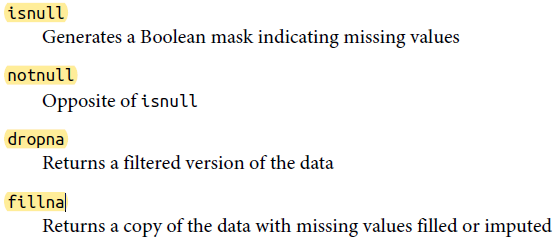

In [28]:
data = pd.Series([1,np.nan,'hello',None])
display(data,
        data.isnull(),
        data[~data.isnull()],
        data[data.notnull()],
        data.dropna())

0        1
1      NaN
2    hello
3     None
dtype: object

0    False
1     True
2    False
3     True
dtype: bool

0        1
2    hello
dtype: object

0        1
2    hello
dtype: object

0        1
2    hello
dtype: object

***
## Dropping Null
***

In [29]:
df = pd.DataFrame([[1,np.nan,2],
                   [2,3,5],
                   [np.nan,4,6]])
display(df,
        df.dropna(),
        df.dropna(axis = 1)) # axis = 1 代表 columns

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


,0,1,2
1,2.0,3.0,5


,2
0,2
1,5
2,6


In [30]:
df[3] = np.nan
display(df,
        df.dropna(axis = 1,how = 'all'),
        df.dropna(axis = 0,thresh = 3)) # specify min num of non-null values

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


,0,1,2,3
1,2.0,3.0,5,NaN


***
## Filling Null
***

In [31]:
data = pd.Series([1,np.nan,2,None,3],index = list('abcde'),dtype = 'Int32')
display(data,
        data.fillna(-1),
        data.ffill(),
        data.bfill(),
        df,
        df.ffill(axis = 1))

a       1
b    <NA>
c       2
d    <NA>
e       3
dtype: Int32

a     1
b    -1
c     2
d    -1
e     3
dtype: Int32

a    1
b    1
c    2
d    2
e    3
dtype: Int32

a    1
b    2
c    2
d    3
e    3
dtype: Int32

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


***
##  Concatenation
***

In [32]:
ser1 = pd.Series(['A','B','C'],index = [1,2,3])
ser2 = pd.Series(['D','E','F'],index = [4,5,6])
display(pd.concat([ser1,ser2]),
        pd.concat([ser1,ser2],axis = 1))

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

,0,1
1,A,NaN
2,B,NaN
3,C,NaN
4,NaN,D
5,NaN,E
6,NaN,F


In [33]:
def make_df(cols: str,ind: list):
	"Quickly make a DataFrame"
	data = {c:[f'{c}{i}' for i in ind] for c in cols}
	return pd.DataFrame(data,ind)
df1 = make_df('AB',[1,2])
df2 = make_df('AB',[3,4])
display(df1,
		df2,
		pd.concat([df1, df2]))

,A,B
1,A1,B1
2,A2,B2


,A,B
3,A3,B3
4,A4,B4


,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [34]:
df3 = make_df('AB',[0,1])
df4 = make_df('CD',[0,1])
display(df3,
        df4,
        pd.concat([df3,df4],axis = 1))

,A,B
0,A0,B0
1,A1,B1


,C,D
0,C0,D0
1,C1,D1


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


In [35]:
x = make_df('AB',[0,1])
y = make_df('AB',[2,3])
y.index = x.index # make indices match
display(x,
        y,
        pd.concat([x, y]))
# Verify the indice
try:
	pd.concat([x,y],verify_integrity = True)
except ValueError as e:
	print(e)

,A,B
0,A0,B0
1,A1,B1


,A,B
0,A2,B2
1,A3,B3


,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


Indexes have overlapping values: Index([0, 1], dtype='int64')


In [36]:
# Ignoring the index
display(x,
        y,
        pd.concat([x,y],ignore_index = True))

,A,B
0,A0,B0
1,A1,B1


,A,B
0,A2,B2
1,A3,B3


,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [37]:
# Adding MultiIndex keys
display(x,
        y,
        pd.concat([x,y],keys = ['x','y']))

,A,B
0,A0,B0
1,A1,B1


,A,B
0,A2,B2
1,A3,B3


A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

***
## Categories of Joins
***

In [38]:
# One to One join
df1 = pd.DataFrame({'employee':['Bob','Jake','Lisa','Sue'],
                    'group':['Accounting','Engineering','Engineering','HR']})
df2 = pd.DataFrame({'employee':['Lisa','Bob','Jake','Sue'],
                    'hire_date':[2004,2008,2012,2014]})
df3 = df1.merge(df2)
display(df1,
        df2,
        df1.merge(df2)) # equivalent to pd.merge(df1,df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [39]:
# Many-to-One
df4 = pd.DataFrame({'group':['Accounting','Engineering','HR'],
                    'supervisor':['Carly','Guido','Steve']})
display(df3,
        df4,
        pd.merge(df3,df4))

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [40]:
df5 = pd.DataFrame({'group': ['Accounting','Accounting','Engineering','Engineering','HR','HR'],
                    'skills': ['math','spreadsheets','software','math','spreadsheets','organization']})
display(df1,df5,df1.merge(df5))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,software
3,Engineering,math
4,HR,spreadsheets
5,HR,organization


,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,software
3,Jake,Engineering,math
4,Lisa,Engineering,software
5,Lisa,Engineering,math
6,Sue,HR,spreadsheets
7,Sue,HR,organization


***
## Merge Key
***

In [41]:
# explicitly specify the name of the key column
display(df1,
        df2,
        df1.merge(df2,on = 'employee'))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [42]:
# left_on and right_on
df3 = pd.DataFrame({'name':['Bob','Jake','Lisa','Sue'],
                    'salary':[70000,80000,120000,90000]})
display(df1,
        df3,
        df1.merge(df3,left_on = 'employee',right_on = 'name'), # drop redundant column
        df1.merge(df3,left_on = 'employee',right_on = 'name').drop('name',axis = 1))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [43]:
# use the index as the key for merging 
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display(df1a,
        df2a,
        df1a.merge(df2a,left_index = True,right_index = True))

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [44]:
# mix indices and columns, you can combine left_index with right_on
display(df1a,
        df3,
        df1a.merge(df3,left_index = True,right_on = 'name'))

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


In [45]:
# join() method, which performs an index-based merge without extra keywords
display(df1.join(df3),
        df1a.join(df2a))

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [46]:
df6 = pd.DataFrame({'name':['Peter','Paul','Mary'],
                    'food':['fish','beans','bread']},
                    columns = ['name','food'])
df7 = pd.DataFrame({'name':['Mary','Joseph'],
                    'drink':['wine','beer']},
                    columns = ['name','drink'])
display(df6,
        df7,
        df6.merge(df7), # default is inner join
        df6.merge(df7,how = 'outer'),
        df6.merge(df7,how = 'left'))

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


,name,drink
0,Mary,wine
1,Joseph,beer


,name,food,drink
0,Mary,bread,wine


,name,food,drink
0,Joseph,NaN,beer
1,Mary,bread,wine
2,Paul,beans,NaN
3,Peter,fish,NaN


,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [47]:
# Overlapping column names
df8 = pd.DataFrame({'name':['Bob','Jake','Lisa','Sue'],
                    'rank':[1,2,3,4]})
df9 = pd.DataFrame({'name':['Bob','Jake','Lisa','Sue'],
                    'rank':[3,1,4,2]})
display(df8,
        df9,
        df8.merge(df9,on = 'name'),
        df8.merge(df9,on = 'name',suffixes = [' for L',' for R']))

,name,rank
0,Bob,1
1,Jake,2
2,Lisa,3
3,Sue,4


,name,rank
0,Bob,3
1,Jake,1
2,Lisa,4
3,Sue,2


,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


,name,rank for L,rank for R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


***
## Aggregation
***

In [48]:
import seaborn as sns
planets = sns.load_dataset('planets')
display(planets.shape,
        planets.head())

(1035, 6)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [49]:
# Show the null related info
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


### Both size and count can be used in combination with groupby. 
### size includes NaN values. 
### count excludes the missing values.

In [50]:
# Show the difference between size and count
mdf = pd.concat([planets.groupby('method')['mass'].size(),
           		 planets.groupby('method')['mass'].count()],axis = 1)
mdf.columns = ['size','count']
mdf

,size,count
method,,
Astrometry,2,0
Eclipse Timing Variations,9,2
Imaging,38,0
Microlensing,23,0
Orbital Brightness Modulation,3,0
Pulsar Timing,5,0
Pulsation Timing Variations,1,0
Radial Velocity,553,510
Transit,397,1


In [51]:
# Values count
planets.mass.value_counts().sort_values(ascending = False)

mass
1.8000    6
1.9000    6
2.3000    5
2.6000    5
2.7000    4
         ..
0.0097    1
0.0087    1
0.4720    1
1.6400    1
1.0680    1
Name: count, Length: 381, dtype: int64

In [52]:
# desciptive statistic
display(planets.describe(),
        planets.describe(include = ['object']))

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


,method
count,1035
unique,10
top,Radial Velocity
freq,553


***
## Group By
***

In [53]:
# Find all Q3 in orbital_period for all method
planets.groupby('method')['orbital_period'].quantile(3/4)

method
Astrometry                         823.590000
Eclipse Timing Variations         5767.000000
Imaging                          94250.000000
Microlensing                      3550.000000
Orbital Brightness Modulation        0.943908
Pulsar Timing                       98.211400
Pulsation Timing Variations       1170.000000
Radial Velocity                    982.000000
Transit                             16.145700
Transit Timing Variations          108.505500
Name: orbital_period, dtype: float64

In [54]:
# Iteration over groups
for (method,year),group in planets.groupby(['method','year']):
	if year >= 2013:
		print(f"{year} {method:30s} shape = {group.shape}")

2013 Astrometry                     shape = (1, 6)
2013 Imaging                        shape = (7, 6)
2013 Microlensing                   shape = (4, 6)
2013 Orbital Brightness Modulation  shape = (1, 6)
2013 Radial Velocity                shape = (29, 6)
2014 Radial Velocity                shape = (11, 6)
2013 Transit                        shape = (75, 6)
2014 Transit                        shape = (40, 6)
2013 Transit Timing Variations      shape = (1, 6)
2014 Transit Timing Variations      shape = (1, 6)


In [55]:
# Find the descriptive stat in distance for all method
planets.groupby('method')['distance'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,17.875000,4.094148,14.98,16.4275,17.875,19.3225,20.77
Eclipse Timing Variations,4.0,315.360000,213.203907,130.72,130.7200,315.360,500.0000,500.00
Imaging,32.0,67.715937,53.736817,7.69,22.1450,40.395,132.6975,165.00
Microlensing,10.0,4144.000000,2076.611556,1760.00,2627.5000,3840.000,4747.5000,7720.00
Orbital Brightness Modulation,2.0,1180.000000,0.000000,1180.00,1180.0000,1180.000,1180.0000,1180.00
Pulsar Timing,1.0,1200.000000,NaN,1200.00,1200.0000,1200.000,1200.0000,1200.00
Pulsation Timing Variations,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Radial Velocity,530.0,51.600208,45.559381,1.35,24.4125,40.445,59.2175,354.00
Transit,224.0,599.298080,913.876990,38.00,200.0000,341.000,650.0000,8500.00


In [56]:
# Dispatch method
planets.groupby('method')['distance'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           4.0
       Imaging                            32.0
       Microlensing                       10.0
       Orbital Brightness Modulation       2.0
                                         ...  
max    Pulsar Timing                    1200.0
       Pulsation Timing Variations         NaN
       Radial Velocity                   354.0
       Transit                          8500.0
       Transit Timing Variations        2119.0
Length: 80, dtype: float64

***
## Interquantile Range = IQR = ${Q_3 - Q_1}$
***

In [57]:
planets.groupby(['method'])['distance'].aggregate([lambda x:max(x.quantile(1/4) - 1.5 * (x.quantile(3/4) - x.quantile(1/4)),0),
                                                   'median',
                                                   lambda x:x.quantile(3/4) + 1.5 * (x.quantile(3/4) - x.quantile(1/4))])


,<lambda_0>,median,<lambda_1>
method,,,
Astrometry,12.085,17.875,23.66500
Eclipse Timing Variations,0.000,315.360,1053.92000
Imaging,0.000,40.395,298.52625
Microlensing,0.000,3840.000,7927.50000
Orbital Brightness Modulation,1180.000,1180.000,1180.00000
Pulsar Timing,1200.000,1200.000,1200.00000
Pulsation Timing Variations,NaN,NaN,NaN
Radial Velocity,0.000,40.445,111.42500
Transit,0.000,341.000,1325.00000


In [58]:
# Find those distance and orbital are null in Microlensing
planets[(planets.method == 'Microlensing') &
        (planets.orbital_period.isnull() & planets.distance.isnull())]

,method,number,orbital_period,mass,distance,year
902,Microlensing,1,NaN,NaN,NaN,2008
903,Microlensing,1,NaN,NaN,NaN,2008
904,Microlensing,1,NaN,NaN,NaN,2009
907,Microlensing,1,NaN,NaN,NaN,2010
917,Microlensing,1,NaN,NaN,NaN,2004
923,Microlensing,1,NaN,NaN,NaN,2009


***
## apply vs transform
***

In [59]:
# transformation
planets.groupby('method')['distance'].transform(lambda x:np.abs(x - x.mean())).sort_values().head(10)

945    0.000000
787    0.000000
788    0.000000
521    0.209792
357    0.240208
496    0.269792
424    0.340208
274    0.369792
318    0.429792
319    0.429792
Name: distance, dtype: float64

In [60]:
# apply
planets.groupby('method')['distance'].apply(lambda x:np.abs(x - x.mean())).sort_values().head(10)

method                            
Orbital Brightness Modulation  787    0.000000
                               788    0.000000
Pulsar Timing                  945    0.000000
Radial Velocity                521    0.209792
                               357    0.240208
                               496    0.269792
                               424    0.340208
                               274    0.369792
                               318    0.429792
                               319    0.429792
Name: distance, dtype: float64

In [61]:
abs(planets.loc[planets.method == 'Radial Velocity','distance'].dropna() \
- planets.loc[planets.method == 'Radial Velocity','distance'].mean()).sort_values().head(7)

521    0.209792
357    0.240208
496    0.269792
424    0.340208
274    0.369792
319    0.429792
318    0.429792
Name: distance, dtype: float64

In [62]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
planets['decade'] = decade
planets.groupby(['method','decade']).count().unstack().fillna(0)

number                     orbital_period        \
decade                         1980s 1990s  2000s  2010s          1980s 1990s   
method                                                                          
Astrometry                       0.0   0.0    0.0    2.0            0.0   0.0   
Eclipse Timing Variations        0.0   0.0    3.0    6.0            0.0   0.0   
Imaging                          0.0   0.0   20.0   18.0            0.0   0.0   
Microlensing                     0.0   0.0   10.0   13.0            0.0   0.0   
Orbital Brightness Modulation    0.0   0.0    0.0    3.0            0.0   0.0   
Pulsar Timing                    0.0   3.0    1.0    1.0            0.0   3.0   
Pulsation Timing Variations      0.0   0.0    1.0    0.0            0.0   0.0   
Radial Velocity                  1.0  28.0  309.0  215.0            1.0  28.0   
Transit                          0.0   0.0   62.0  335.0            0.0   0.0   
Transit Timing Variations        0.0   0.0    0.0    4.0            0.0   0.0   

                                             mass                      \
decade                         2000s  2010s 1980s 1990s  2000s  2010s   
method                                                                  
Astrometry                       0.0    2.0   0.0   0.0    0.0    0.0   
Eclipse Timing Variations        3.0    6.0   0.0   0.0    1.0    1.0   
Imaging                          9.0    3.0   0.0   0.0    0.0    0.0   
Microlensing                     5.0    2.0   0.0   0.0    0.0    0.0   
Orbital Brightness Modulation    0.0    3.0   0.0   0.0    0.0    0.0   
Pulsar Timing                    1.0    1.0   0.0   0.0    0.0    0.0   
Pulsation Timing Variations      1.0    0.0   0.0   0.0    0.0    0.0   
Radial Velocity                309.0  215.0   1.0  25.0  295.0  189.0   
Transit                         62.0  335.0   0.0   0.0    0.0    1.0   
Transit Timing Variations        0.0    3.0   0.0   0.0    0.0    0.0   

                              distance                      year               \
decade                           1980s 1990s  2000s  2010s 1980s 1990s  2000s   
method                                                                          
Astrometry                         0.0   0.0    0.0    2.0   0.0   0.0    0.0   
Eclipse Timing Variations          0.0   0.0    2.0    2.0   0.0   0.0    3.0   
Imaging                            0.0   0.0   16.0   16.0   0.0   0.0   20.0   
Microlensing                       0.0   0.0    0.0   10.0   0.0   0.0   10.0   
Orbital Brightness Modulation      0.0   0.0    0.0    2.0   0.0   0.0    0.0   
Pulsar Timing                      0.0   0.0    0.0    1.0   0.0   3.0    1.0   
Pulsation Timing Variations        0.0   0.0    0.0    0.0   0.0   0.0    1.0   
Radial Velocity                    1.0  28.0  301.0  200.0   1.0  28.0  309.0   
Transit                            0.0   0.0   44.0  180.0   0.0   0.0   62.0   
Transit Timing Variations          0.0   0.0    0.0    3.0   0.0   0.0    0.0   

                                      
decade                         2010s  
method                                
Astrometry                       2.0  
Eclipse Timing Variations        6.0  
Imaging                         18.0  
Microlensing                    13.0  
Orbital Brightness Modulation    3.0  
Pulsar Timing                    1.0  
Pulsation Timing Variations      0.0  
Radial Velocity                215.0  
Transit                        335.0  
Transit Timing Variations        4.0

***
## Pivot
***

In [63]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [64]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [65]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')

C:\Users\User\AppData\Local\Temp\ipykernel_13056\60503751.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')


sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [66]:
titanic.groupby(['sex', 'class'],observed = True)['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [67]:
titanic.pivot_table('survived',index = 'sex',
                               columns = 'class',
                               aggfunc = 'mean',
                               observed = False)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447
